<a href="https://colab.research.google.com/github/OhMinSuk/KBO-Analysis/blob/main/KBO_%ED%8A%B8%EB%A0%8C%EB%93%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚾ KBO 트렌드 데이터 분석 정리본 (2022–2023 시즌)


#**22-23시즌 KBO 일자별 순위 데이터 크롤링**

In [ ]:
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

!apt-get -qq -y install fonts-nanum > /dev/null

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'})

**크롤링 데이터 팀명 전처리**

In [ ]:
df_data = pd.read_csv('/content/24KBO일자별데이터.csv')

df_data['team'] = df_data['team'].replace('KIA', '기아타이거즈')
df_data['team'] = df_data['team'].replace('두산', '두산베어스')
df_data['team'] = df_data['team'].replace('롯데', '롯데자이언츠')
df_data['team'] = df_data['team'].replace('한화', '한화이글스')
df_data['team'] = df_data['team'].replace('키움', '키움히어로즈')
df_data['team'] = df_data['team'].replace('삼성', '삼성라이온즈')
df_data['team'] = df_data['team'].replace('LG', 'LG트윈스')
df_data['team'] = df_data['team'].replace('SSG', 'SSG랜더스')
df_data['team'] = df_data['team'].replace('NC', 'NC다이노스')
df_data['team'] = df_data['team'].replace('KT', 'KT위즈')

df_data= df_data.drop(df_data.columns[0],axis=1)
df_data.head()

,rank,team,win_rate,streak,date
0,1,기아타이거즈,0.613,2승,2024.10.01
1,2,삼성라이온즈,0.549,1패,2024.10.01
2,3,LG트윈스,0.535,2승,2024.10.01
3,4,두산베어스,0.521,4승,2024.10.01
4,5,KT위즈,0.507,3승,2024.10.01


#**CSV 병합(일자별 KBO구단 검색량 데이터)**

In [ ]:
# https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=3e6434a0-1e55-11eb-a4e6-a9a03a61580b

import pandas as pd
import glob

# CSV 파일들이 있는 폴더 경로
path = './'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

frame.to_csv("/", index=False)# 저장할 경로 지정


- MLB 데이터 제거

- 불필요한 Attribute 제거 (SEQ_NO,ALL_KWRD_RANK_CO,UPPER_CTGRY_NM,LWPRT_CTGRY_NM,LEA_NM)</br>
- 날짜 포맷 변경(%Y.%m.%d)

In [ ]:
df = df.drop(df.columns[[0,1,3,4,5]],axis=1)

df['SCCNT_DE'] = pd.to_datetime(df['SCCNT_DE'], format='%Y%m%d')
df['SCCNT_DE'] = df['SCCNT_DE'].dt.strftime('%Y.%m.%d')


df= df.rename(columns={'SRCHWRD_NM': 'team','MOBILE_SCCNT_VALUE': 'mobile_value','PC_SCCNT_VALUE': 'pc_value','SCCNT_SM_VALUE': 'sum_value','SCCNT_DE': 'date'})

df['team'] = df['team'].replace('KIA', '기아타이거즈')
df['team'] = df['team'].replace('두산', '두산베어스')
df['team'] = df['team'].replace('롯데', '롯데자이언츠')
df['team'] = df['team'].replace('한화', '한화이글스')
df['team'] = df['team'].replace('키움', '키움히어로즈')
df['team'] = df['team'].replace('삼성', '삼성라이온즈')
df['team'] = df['team'].replace('LG', 'LG트윈스')
df['team'] = df['team'].replace('SSG', 'SSG랜더스')
df['team'] = df['team'].replace('NC', 'NC다이노스')
df['team'] = df['team'].replace('KT', 'KT위즈')

**22년, 23년 데이터 병합 및 컬럼명 변경**

In [ ]:
df1 = pd.read_csv('/content/23년최종.csv')
df2 = pd.read_csv('/content/22년최종.csv')

# 두 데이터프레임 합치기
merged_df = pd.concat([df1, df2])

#컬럼명 변경
df_final = merged_df.rename(columns={'SRCHWRD_NM': 'team', 'MOBILE_SCCNT_VALUE': 'mobile_value','PC_SCCNT_VALUE': 'pc_value','SCCNT_SM_VALUE': 'sum_value','SCCNT_DE': 'date'})

# 새로운 CSV 파일로 저장
df_final.to_csv('22-23검색량데이터.csv', index=False)


# 관중수 데이터 전처리

#관중수 및 홈 어웨이 구장 데이터 추가

### 홈 어웨이 (70:30) 비율로 계산하여 새로운 attendance열 추가 및 구장별 수용 관중 수 비율 추가

In [ ]:
import pandas as pd
import numpy as np

# CSV 파일 읽기
df = pd.read_csv('/content/24KBO데이터.csv')

# 'attendance' 열의 쉼표 제거 및 숫자형으로 변환
df['attendance'] = df['attendance'].replace(',', '', regex=True)
df['attendance'] = pd.to_numeric(df['attendance'], errors='coerce')

# 새로운 열 'new_attendance' 추가 및 계산
df['new_attendance'] = np.where(df['home_or_away'] == 'home', df['attendance'] * 0.7, df['attendance'] * 0.3)

# new_attendance 열을 정수형으로 변환하고 반올림
df['new_attendance'] = df['new_attendance'].round().astype('Int64')

# 'away'인 경우 'new_attendance' 값을 NaN으로 변경
df.loc[df['home_or_away'] == 'away', 'new_attendance'] = np.nan

# 구장별 수용 인원
stadium_capacity = {
    '문학': 23000, '광주': 20500, '잠실': 25000, '창원': 17800,
    '대전': 13000, '대구': 24000, '사직': 23000, '수원': 19000,
    '고척': 16000, '울산': 12000, '포항': 12000
}

# attendance 비율 계산 함수
def calculate_attendance_ratio(row):
    if pd.notnull(row['attendance']) and row['stadium'] in stadium_capacity:
        return min(row['attendance'] / stadium_capacity[row['stadium']], 1) * 100
    return None

# attendance 비율 계산 및 포맷팅
df['attendance_ratio'] = df.apply(calculate_attendance_ratio, axis=1)
df['attendance_ratio'] = df['attendance_ratio'].apply(lambda x: round(x, 2) if pd.notnull(x) else None)

# rank 열을 범주형으로 변환
df['rank'] = df['rank'].astype('category')

# 결과 저장
df.to_csv('24KBO데이터최종.csv', index=False)

# 결과 확인
print(df[['home_or_away', 'attendance', 'new_attendance', 'attendance_ratio']].head(10))

  home_or_away  attendance  new_attendance  attendance_ratio
0         home     20500.0           14350             100.0
1          NaN         NaN            <NA>               NaN
2          NaN         NaN            <NA>               NaN
3          NaN         NaN            <NA>               NaN
4          NaN         NaN            <NA>               NaN
5         home     23000.0           16100             100.0
6          NaN         NaN            <NA>               NaN
7          NaN         NaN            <NA>               NaN
8         away     20500.0            <NA>             100.0
9         away     23000.0            <NA>             100.0


수치형

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


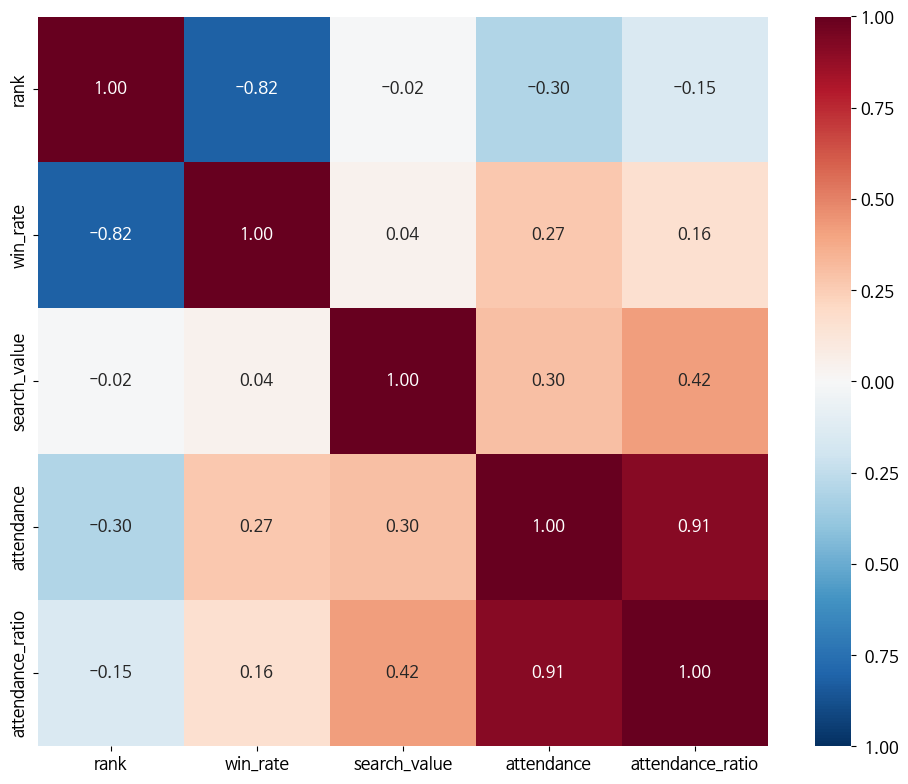

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 읽기
def create_correlation_heatmap(df):
    # 분석에 사용할 수치형 컬럼 선택
    numeric_columns = ['rank', 'win_rate', 'search_value', 'attendance', 'attendance_ratio']

    # 상관계수 행렬 계산
    correlation_matrix = df[numeric_columns].corr()

    # 히트맵 크기 설정
    plt.figure(figsize=(10, 8))

    # 히트맵 생성
    sns.heatmap(correlation_matrix,
                annot=True,  # 상관계수 값 표시
                cmap='RdBu_r',  # 색상 맵 (빨간색-흰색-파란색)
                vmin=-1, vmax=1,  # 상관계수 범위
                center=0,  # 중심값
                fmt='.2f',  # 소수점 둘째자리까지 표시
                square=True)  # 정사각형 형태로 표시


    plt.tight_layout()

    return plt

# 데이터 전처리
def preprocess_data(df):
    # 연속 컬럼에서 숫자만 추출 ('승', '패' 제거)
    df['streak_num'] = df['streak'].str.extract('(\d+)').astype(float)

    # home_or_away를 더미 변수로 변환
    df = pd.get_dummies(df, columns=['home_or_away'], drop_first=True)

    return df

# 메인 분석 코드
def main():
    # CSV 파일을 데이터프레임으로 읽기
    df = pd.read_csv('/content/24KBO데이터최종종.csv')

    # 데이터 전처리
    df = preprocess_data(df)

    # 히트맵 생성
    plt = create_correlation_heatmap(df)
    plt.show()

if __name__ == "__main__":
    main()

<ipython-input-3-8f2537352f67>:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_stats = df.groupby('attendance_category').agg({



=== 기본 통계량 ===
    Metric  Attendance Ratio   Search Value
0     Mean         55.882929   29503.776586
1   Median         53.000000   23555.000000
2  Std Dev         26.293114   22806.453956
3      Min          5.000000    2073.000000
4      Max        100.000000  237815.000000

=== 구간별 분석 ===


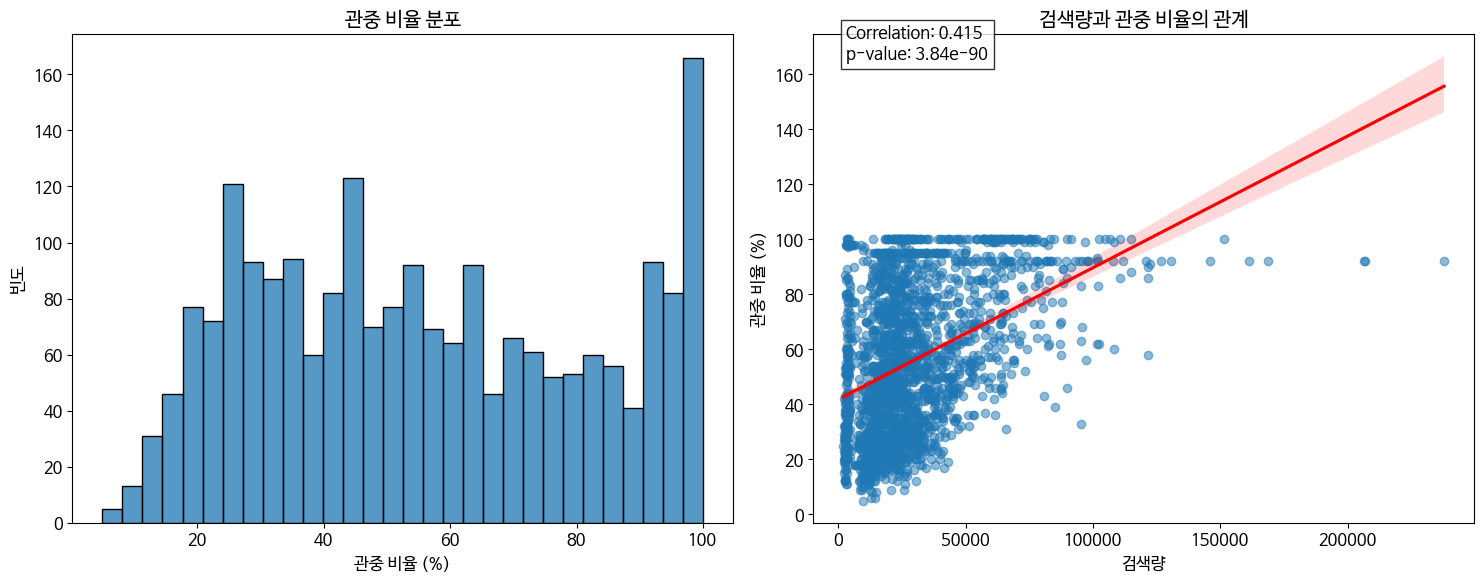

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def detailed_attendance_analysis(df):
    # 1. 기본 통계량 계산
    stats_df = pd.DataFrame({
        'Metric': ['Mean', 'Median', 'Std Dev', 'Min', 'Max'],
        'Attendance Ratio': [
            df['attendance_ratio'].mean(),
            df['attendance_ratio'].median(),
            df['attendance_ratio'].std(),
            df['attendance_ratio'].min(),
            df['attendance_ratio'].max()
        ],
        'Search Value': [
            df['search_value'].mean(),
            df['search_value'].median(),
            df['search_value'].std(),
            df['search_value'].min(),
            df['search_value'].max()
        ]
    })

    # 2. 그래프 생성
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # 2.1 히스토그램과 밀도 플롯
    sns.histplot(data=df, x='attendance_ratio', bins=30, ax=ax1)
    ax1.set_title('관중 비율 분포')
    ax1.set_xlabel('관중 비율 (%)')
    ax1.set_ylabel('빈도')

    # 2.2 산점도와 회귀선
    sns.regplot(data=df,
                x='search_value',
                y='attendance_ratio',
                scatter_kws={'alpha':0.5},
                line_kws={'color': 'red'},
                ax=ax2)
    ax2.set_title('검색량과 관중 비율의 관계')
    ax2.set_xlabel('검색량')
    ax2.set_ylabel('관중 비율 (%)')

    # 상관계수와 p-value 표시
    correlation, p_value = stats.pearsonr(df['search_value'], df['attendance_ratio'])
    stats_text = f'Correlation: {correlation:.3f}\np-value: {p_value:.2e}'
    ax2.text(0.05, 0.95, stats_text, transform=ax2.transAxes,
             bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()

    # 3. 주요 구간별 분석
    attendance_bins = [0, 25, 50, 75, 100]
    df['attendance_category'] = pd.cut(df['attendance_ratio'],
                                     bins=attendance_bins,
                                     labels=['0-25%', '26-50%', '51-75%', '76-100%'])

    category_stats = df.groupby('attendance_category').agg({
        'search_value': ['mean', 'count'],
        'attendance_ratio': 'mean'
    }).round(2)

    return plt, stats_df, category_stats
    print(p_value)
def main():
    # 데이터 로드
    df = pd.read_csv('/content/24KBO데이터최종종.csv')
    df = df.dropna(subset=['search_value', 'attendance_ratio'])

    # 분석 실행
    plt, stats_df, category_stats = detailed_attendance_analysis(df)

    # 결과 출력
    print("\n=== 기본 통계량 ===")
    print(stats_df)
    print("\n=== 구간별 분석 ===")


    plt.show()

if __name__ == "__main__":
    main()


=== 팀별 평균 관중 비율 ===
      평균_관중비율    평균_검색량  관중비율_표준편차      총_관중수  경기수
team                                              
LG      64.83  15629.25      22.92  3486653.0  215
SSG     64.21  23400.01      21.99  3131271.0  212
한화      61.14  52858.90      25.90  1715098.0  215
KIA     58.12  47377.77      26.61  2585826.0  217
롯데      57.04  49779.32      25.41  2772969.0  218
삼성      56.63  40250.26      26.84  2846886.0  215
두산      54.09  25607.69      28.19  2934138.0  217
키움      50.05  18339.70      27.04  1715412.0  214
KT      49.93   3759.99      25.09  2026313.0  213
NC      42.80  18819.19      24.55  1623021.0  213

=== 팀별 평균 검색량 ===
      평균_관중비율    평균_검색량  관중비율_표준편차      총_관중수  경기수
team                                              
한화      61.14  52858.90      25.90  1715098.0  215
롯데      57.04  49779.32      25.41  2772969.0  218
KIA     58.12  47377.77      26.61  2585826.0  217
삼성      56.63  40250.26      26.84  2846886.0  215
두산      54.09  25607.69      28.19  293413

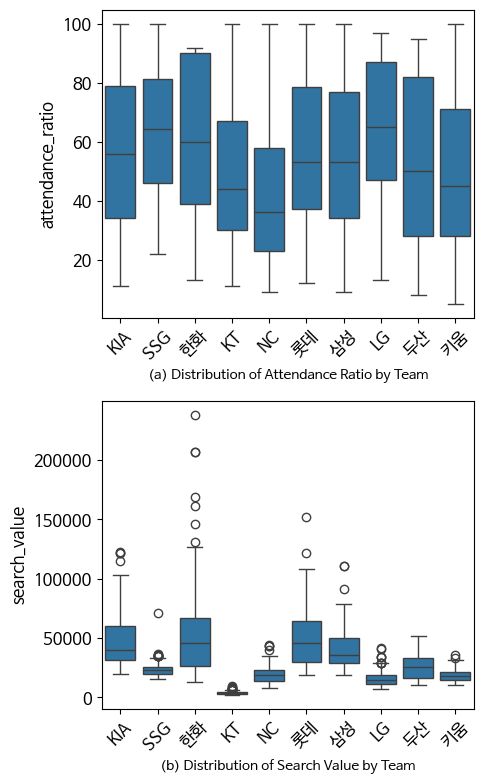

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def analyze_team_popularity(df):
    # 홈 경기 데이터만 선택
    home_games = df[df['home_or_away'] == 'home']

    # 팀별 종합 지표 계산
    team_stats = pd.DataFrame({
        '평균_관중비율': home_games.groupby('team')['attendance_ratio'].mean(),
        '평균_검색량': home_games.groupby('team')['search_value'].mean(),
        '관중비율_표준편차': home_games.groupby('team')['attendance_ratio'].std(),
        '총_관중수': home_games.groupby('team')['attendance'].sum(),
        '경기수': home_games.groupby('team')['attendance'].count()
    }).round(2)

    # 정렬해서 출력
    print("\n=== 팀별 평균 관중 비율 ===")
    print(team_stats.sort_values('평균_관중비율', ascending=False))

    print("\n=== 팀별 평균 검색량 ===")
    print(team_stats.sort_values('평균_검색량', ascending=False))

def visualize_team_stats(df):
   home_games = df[df['home_or_away'] == 'home']

   # 2x1 subplot으로 변경 (상하 배치)
   fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 8))

   # 팀별 관중 비율 boxplot
   sns.boxplot(x='team', y='attendance_ratio', data=home_games, ax=ax1)

   ax1.tick_params(axis='x', rotation=45)
   ax1.set_xlabel('(a) Distribution of Attendance Ratio by Team', fontsize=10)

   # 팀별 검색량 boxplot
   sns.boxplot(x='team', y='search_value', data=home_games, ax=ax2)
   ax2.set_xlabel('(b) Distribution of Search Value by Team', fontsize=10)

   ax2.tick_params(axis='x', rotation=45)

   plt.tight_layout()
   return plt

def main():
    # 데이터 로드
    df = pd.read_csv('/content/24KBO데이터최종종.csv')

    # 분석 함수 호출
    analyze_team_popularity(df)

    # 시각화 함수 호출 및 그래프 표시
    plt = visualize_team_stats(df)
    plt.show()

if __name__ == "__main__":
    main()

# **팀별 검색량 분석**

In [ ]:
df = pd.read_csv('/content/24KBO데이터최종종.csv')

df_grouped = df.groupby('team', as_index=False)['search_value'].sum()

# Plotly를 사용하여 수평 막대 그래프 생성
fig = px.bar(df_grouped, x='search_value', y='team',
             title='팀별 검색량',
             labels={'search_value': '검색량', 'team': '팀'},
             text='search_value') # 막대 위에 값을 표시

# 막대 위에 마우스를 올렸을 때 보여줄 정보 설정
fig.update_traces(texttemplate='%{text}', textposition='inside')

# 그래프 보여주기
fig.show()

<ipython-input-41-e6134a1cabdf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=attendance_sum.index, y=attendance_sum.values, palette='rainbow')


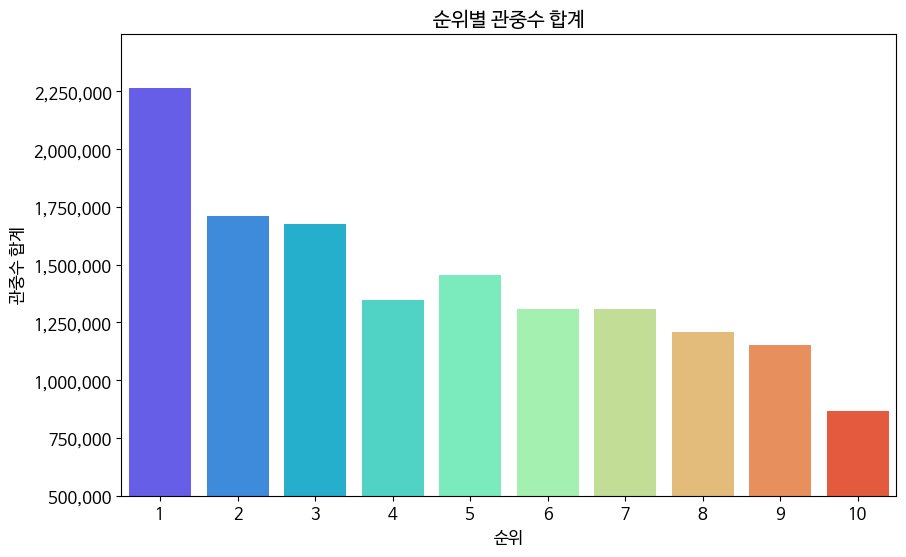

In [ ]:
data = pd.read_csv('/content/22-23KBO데이터최종종.csv')

data = data[data['attendance'].notnull()]

# 순위별 관중수 합계 계산
attendance_sum = data.groupby('rank')['attendance'].sum()

# 시각화
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=attendance_sum.index, y=attendance_sum.values, palette='rainbow')

# y축 값 범위 설정
plt.ylim(500000, 2500000)

# y축 값 형식 지정
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# y축 틱 설정
y_ticks = np.arange(500000, 2300000, 250000)
plt.gca().set_yticks(y_ticks)

# x축 범위 설정
plt.xticks(np.arange(0, 10))

plt.xlabel('순위')
plt.ylabel('관중수 합계')
plt.title('순위별 관중수 합계')
plt.show()

In [ ]:
df = pd.read_csv('/content/22-23KBO데이터.csv',encoding='cp949')

df_grouped = df.groupby('team', as_index=False)['mobile_value'].sum()

# Plotly를 사용하여 수평 막대 그래프 생성
fig = px.bar(df_grouped, x='mobile_value', y='team',
             title='팀별 모바일 검색량',
             labels={'mobile_value': '검색량', 'team': '팀'},
             text='mobile_value') # 막대 위에 값을 표시

# 막대 위에 마우스를 올렸을 때 보여줄 정보 설정
fig.update_traces(texttemplate='%{text}', textposition='inside')

# 그래프 보여주기
fig.show()

In [ ]:
df_grouped = df.groupby('team', as_index=False)['sum_value'].sum()
df_sorted = df_grouped.sort_values(by='sum_value', ascending=True)

# Plotly를 사용하여 수평 막대 그래프 생성
fig = px.bar(df_sorted, x='sum_value', y='team', orientation='h',
             title='팀별 검색량 합계',
             labels={'sum_value': '검색량', 'team': '팀'},
             text='sum_value') # 막대 위에 값을 표시

# 막대 위에 마우스를 올렸을 때 보여줄 정보 설정
fig.update_traces(texttemplate='%{text}', textposition='inside')

# 그래프 보여주기
fig.show()

In [ ]:
df['date'] = pd.to_datetime(df['date'])

df_2022 = df[df['date'].dt.year == 2022]

df_grouped_2022 = df_2022.groupby('team', as_index=False)['sum_value'].sum()
df_sorted_2022 = df_grouped_2022.sort_values(by='sum_value', ascending=True)

# Plotly를 사용하여 수평 막대 그래프를 생성합니다.
fig = px.bar(df_sorted_2022, x='sum_value', y='team', orientation='h',
             title='2022년 팀별 총 검색량',
             labels={'sum_value': '검색량', 'team': '팀'},
             text='sum_value') # 막대 위에 값을 표시합니다.

# 막대 위의 값 표시 설정을 조정합니다.
fig.update_traces(texttemplate='%{text}', textposition='inside')

# 그래프를 표시합니다.
fig.show()

In [ ]:
df['date'] = pd.to_datetime(df['date'])

df_2023 = df[df['date'].dt.year == 2023]

df_grouped_2023 = df_2023.groupby('team', as_index=False)['sum_value'].sum()
df_sorted_2023 = df_grouped_2023.sort_values(by='sum_value', ascending=True)

# Plotly를 사용하여 수평 막대 그래프를 생성합니다.
fig = px.bar(df_sorted_2023, x='sum_value', y='team', orientation='h',
             title='2023년 팀별 총 검색량',
             labels={'sum_value': '검색량', 'team': '팀'},
             text='sum_value') # 막대 위에 값을 표시합니다.

# 막대 위의 값 표시 설정을 조정합니다.
fig.update_traces(texttemplate='%{text}', textposition='inside')

# 그래프를 표시합니다.
fig.show()

<ipython-input-14-3bcdcce1ebea>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='rank', y='sum_value', data=df_grouped, palette='husl')


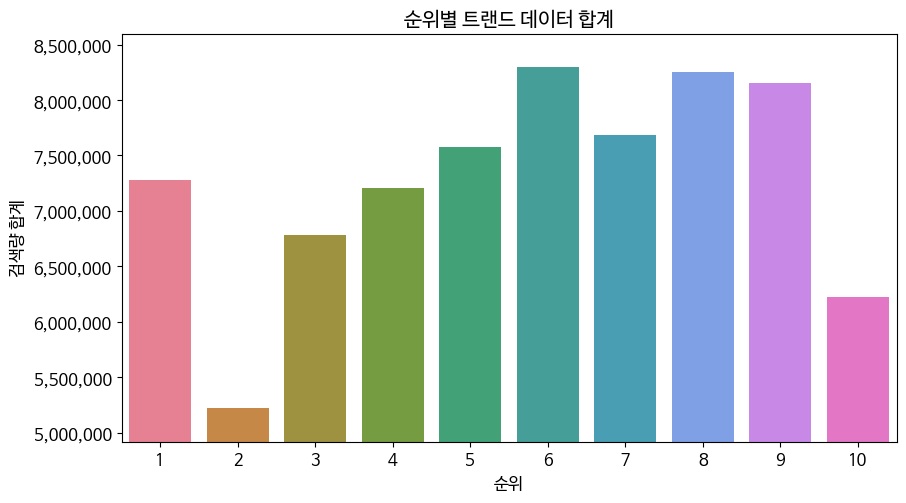

In [ ]:
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
df = pd.read_csv('/content/22-23KBO데이터최종종.csv')

# 데이터 프레임 생성
df_grouped = df.groupby('rank', as_index=False)['sum_value'].sum()

# Seaborn을 사용하여 수직 막대 그래프 생성
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
barplot = sns.barplot(x='rank', y='sum_value', data=df_grouped, palette='husl')

# 레이블과 타이틀 설정
plt.xlabel('순위')
plt.ylabel('검색량 합계')
plt.title('순위별 트랜드 데이터 합계')

# y축 범위 설정
plt.ylim(df_grouped['sum_value'].min() - 300000, df_grouped['sum_value'].max() + 300000)

# y축 값 형식 지정
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# 그래프 간격 조정
plt.subplots_adjust(bottom=0.2)

plt.show()

In [ ]:
df = pd.read_csv('/content/22-23KBO데이터최종.csv')

# NaN 값 드랍
df = df.dropna(subset=['attendance'])

# 데이터 타입을 정수로 변환
df['attendance'] = df['attendance'].astype(int)

# 팀별로 그룹화하고 관중 수 합계 계산
df_grouped = df.groupby('team', as_index=False)['attendance'].sum()

# Create a horizontal bar graph using Plotly
fig = px.bar(df_grouped, x='team', y='attendance',
             title='22-23 팀별 누적 관중수',
             labels={'attendance': '관중수', 'team': '팀'},
             text='attendance') # Display values on top of the bars

# Set information to display when hovering over the bars
fig.update_traces(texttemplate='%{text}', textposition='inside')


new_attendance를 이용한 그래프

In [ ]:
df = pd.read_csv('/content/22-23KBO데이터최종.csv')

# NaN 값 드랍
df = df.dropna(subset=['new_attendance'])

# 데이터 타입을 정수로 변환
df['new_attendance'] = df['new_attendance'].astype(int)

# 팀별로 그룹화하고 관중 수 합계 계산
df_grouped = df.groupby('team', as_index=False)['new_attendance'].sum()

# Create a horizontal bar graph using Plotly
fig = px.bar(df_grouped, x='team', y='new_attendance',
             title='NEW 팀별 관중수',
             labels={'new_attendance': '관중수', 'team': '팀'},
             text='new_attendance') # Display values on top of the bars

# Set information to display when hovering over the bars
fig.update_traces(texttemplate='%{text}', textposition='inside')

<ipython-input-42-a6484a13414e>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



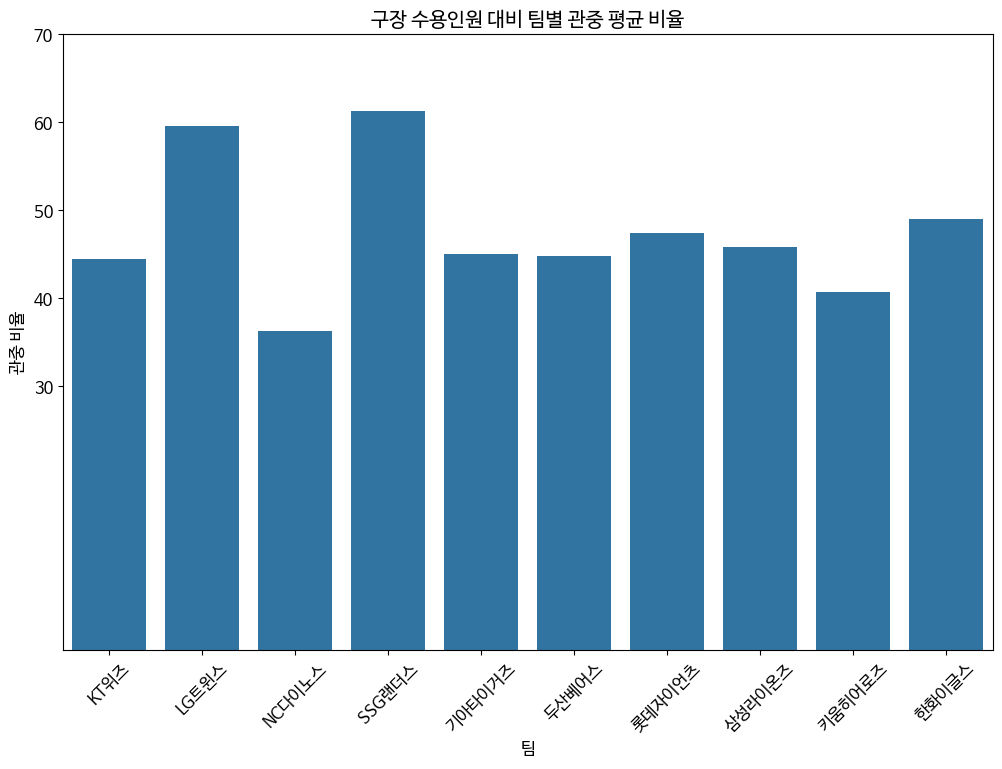

In [ ]:
team_avg_ratio = df.groupby('team')['attendance_ratio'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=team_avg_ratio, x='team', y='attendance_ratio')
plt.xlabel('팀')
plt.ylabel('관중 비율')
plt.title('구장 수용인원 대비 팀별 관중 평균 비율')
plt.xticks(rotation=45)

plt.yticks(np.arange(30, 80, 10))  # y축 틱 간격 설정

plt.show()

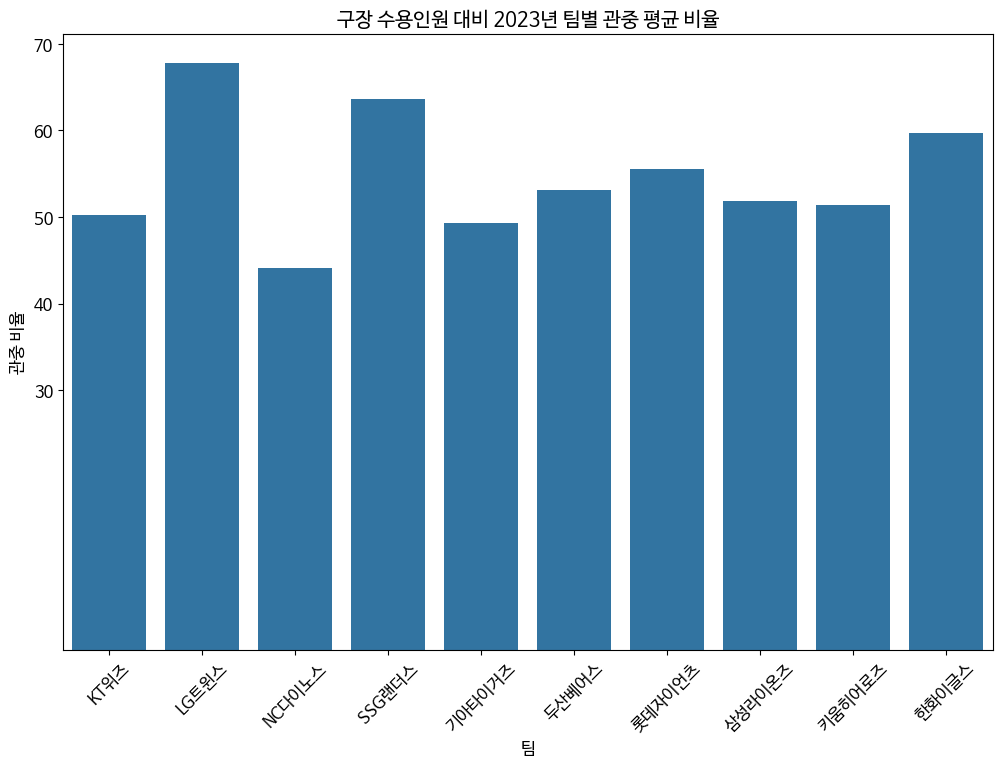

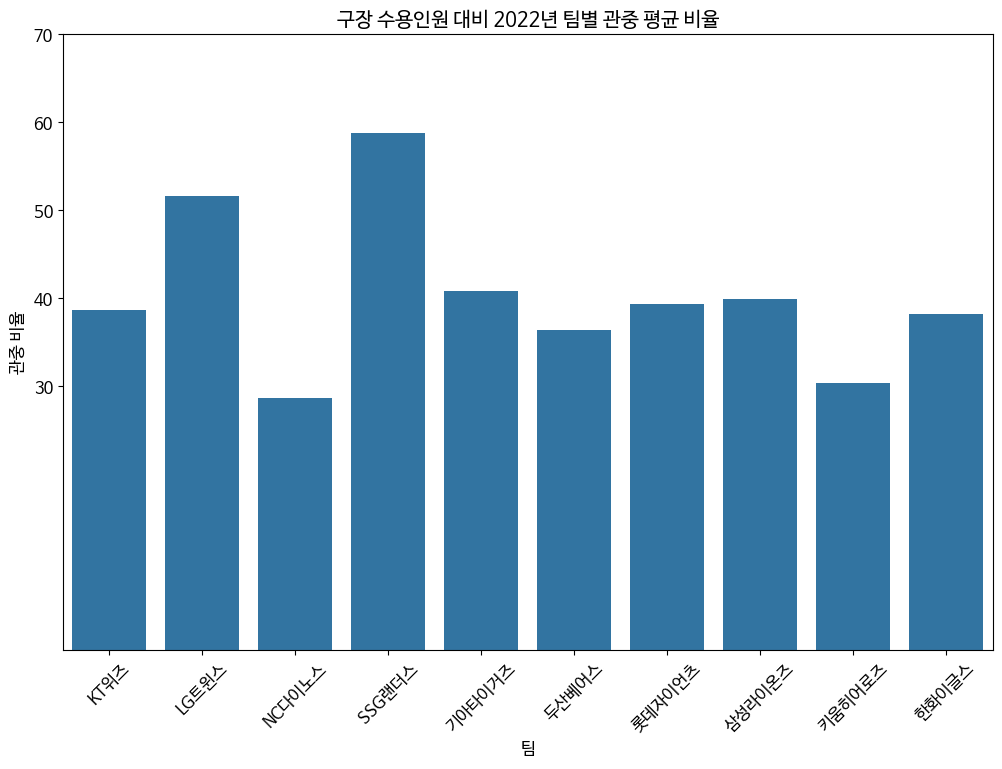

In [ ]:
# 년도 열 추가
df['year'] = pd.to_datetime(df['date']).dt.year

# 2023년 데이터만 추출
df_2023 = df[df['year'] == 2023]

# 2022년 데이터만 추출
df_2022 = df[df['year'] == 2022]

# 2023년 팀별 평균 관중 비율 계산
team_avg_ratio_2023 = df_2023.groupby('team')['attendance_ratio'].mean().reset_index()

# 2022년 팀별 평균 관중 비율 계산
team_avg_ratio_2022 = df_2022.groupby('team')['attendance_ratio'].mean().reset_index()

# 2023년 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=team_avg_ratio_2023, x='team', y='attendance_ratio')
plt.xlabel('팀')
plt.ylabel('관중 비율')
plt.title('구장 수용인원 대비 2023년 팀별 관중 평균 비율')
plt.xticks(rotation=45)
plt.yticks(np.arange(30, 80, 10))
plt.show()

# 2022년 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=team_avg_ratio_2022, x='team', y='attendance_ratio')
plt.xlabel('팀')
plt.ylabel('관중 비율')
plt.title('구장 수용인원 대비 2022년 팀별 관중 평균 비율')
plt.xticks(rotation=45)
plt.yticks(np.arange(30, 80, 10))
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# 데이터 로드
df = pd.read_csv('/content/22-23KBO데이터최종.csv')

df = df.dropna(subset=['attendance'])
df['attendance'] = df['attendance'].astype(int)

# 'date' 컬럼을 datetime 타입으로 변환
df['date'] = pd.to_datetime(df['date'])

# 연도 컬럼 추가
df['year'] = df['date'].dt.year

# 2022년도와 2023년도 데이터 필터링
df_2022 = df[df['year'] == 2022]
df_2023 = df[df['year'] == 2023]

# 2022년도 데이터에 대해 팀별 관중 수 합계 계산 및 시각화
df_grouped_2022 = df_2022.groupby('team', as_index=False)['attendance'].sum()
fig_2022 = px.bar(df_grouped_2022, x='team', y='attendance',
                  title='2022년 팀별 관중수',
                  labels={'attendance': '관중수', 'team': '팀'},
                  text='attendance')
fig_2022.update_traces(texttemplate='%{text}', textposition='inside')
fig_2022.show()

# 2023년도 데이터에 대해 팀별 관중 수 합계 계산 및 시각화
df_grouped_2023 = df_2023.groupby('team', as_index=False)['attendance'].sum()
fig_2023 = px.bar(df_grouped_2023, x='team', y='attendance',
                  title='2023년 팀별 관중수',
                  labels={'attendance': '관중수', 'team': '팀'},
                  text='attendance')
fig_2023.update_traces(texttemplate='%{text}', textposition='inside')
fig_2023.show()


   stadium    attendance
0       고척   6510.430556
1       광주   9212.340278
2       대구  10888.570370
3       대전   6364.684932
4       문학  14072.278912
5       사직  10734.064286
6       수원   8447.541096
7       울산   7058.750000
8       잠실  13021.652921
9       창원   6441.365517
10      포항   6182.666667


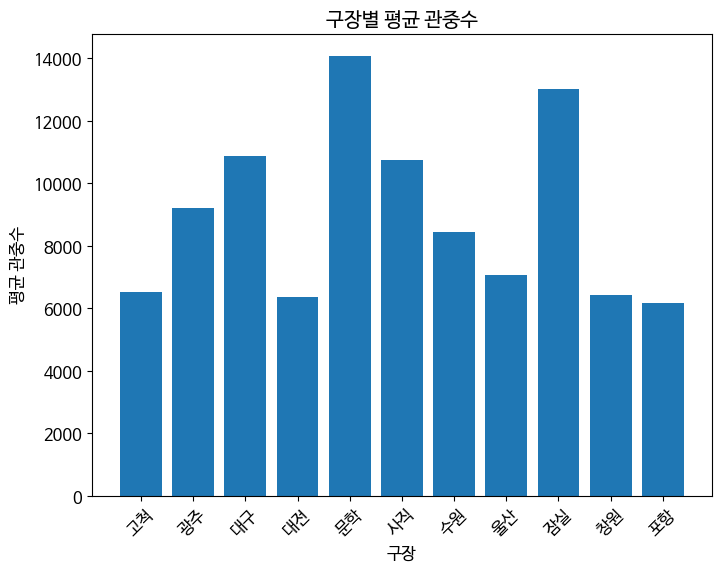

In [ ]:
# 데이터 불러오기
data = pd.read_csv('/content/22-23KBO데이터최종.csv')

# 결측치 제거
data = data.dropna(subset=['stadium', 'attendance'])

# 구장별 평균 관중수 계산
stadium_mean = data.groupby('stadium')['attendance'].mean().reset_index()
print(stadium_mean)

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(stadium_mean['stadium'], stadium_mean['attendance'])
plt.xlabel('구장')
plt.ylabel('평균 관중수')
plt.title('구장별 평균 관중수')
plt.xticks(rotation=45)
plt.show()

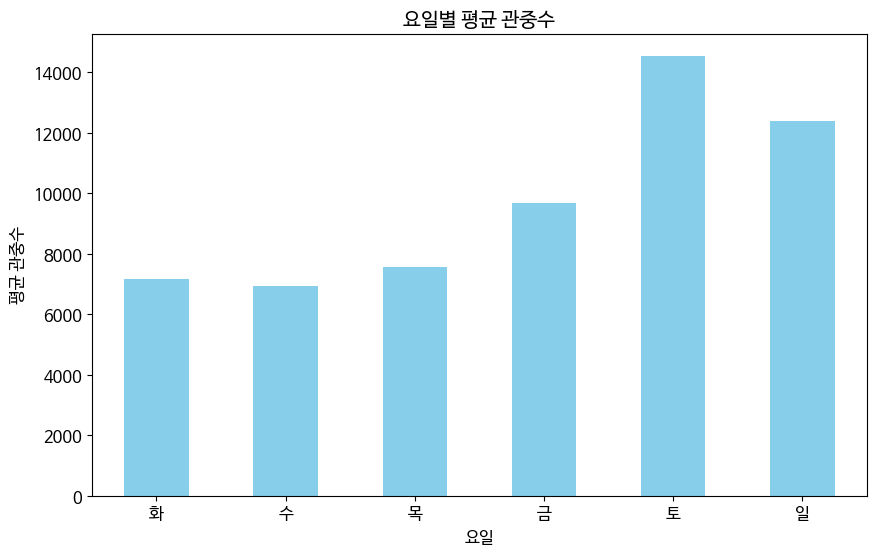

In [ ]:
# 결측값 제거
df_filtered = df.dropna(subset=['attendance', 'day'])
df_filtered = df_filtered[df_filtered['day'] != '월']

# 요일별 관중수 평균 계산
average_attendance_by_day = df_filtered.groupby('day')['attendance'].mean()

# 요일 순서 지정
day_order = ['화', '수', '목', '금', '토', '일']
average_attendance_by_day = average_attendance_by_day.reindex(day_order)

# 시각화
plt.figure(figsize=(10, 6))
average_attendance_by_day.plot(kind='bar', color='skyblue')
plt.title('요일별 평균 관중수')
plt.xlabel('요일')
plt.ylabel('평균 관중수')
plt.xticks(rotation=0)
plt.show()

시즌별 팀별 검색량 추이

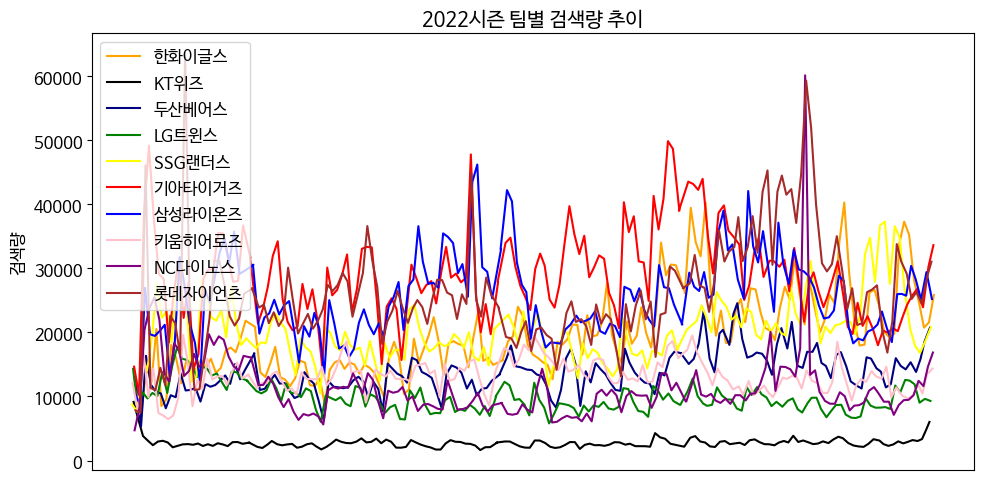

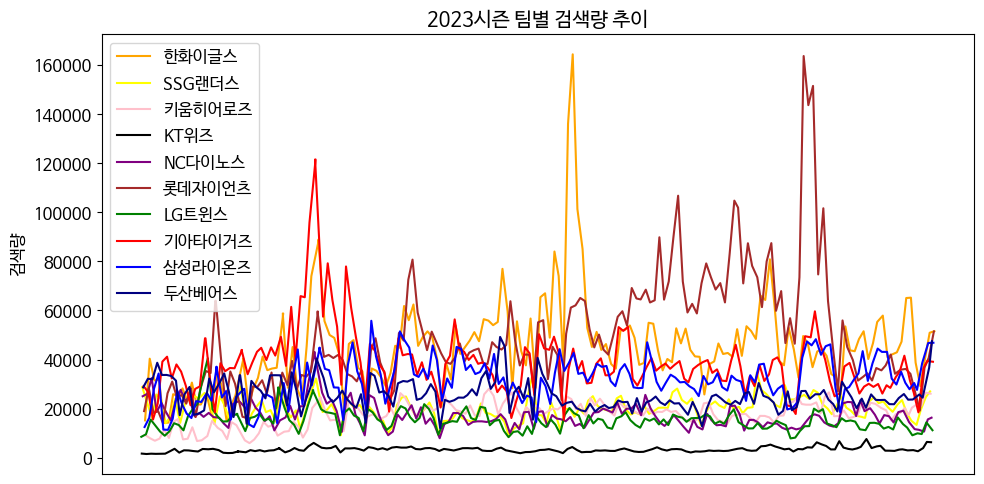

In [ ]:
# 데이터 불러오기
df = pd.read_csv('/content/22-23KBO데이터.csv', encoding='cp949')

colors = {'KT위즈':'black', 'NC다이노스':'purple', '두산베어스':'navy', 'SSG랜더스':'yellow',
          'LG트윈스':'green', '키움히어로즈':'pink', '한화이글스' : 'orange',
          '기아타이거즈':'red', '롯데자이언츠':'brown', '삼성라이온즈':'blue'}

# 2022년도
mask = df['date'] < '2023-01-01'
df_2022 = df.loc[mask]
df_2022 = df_2022.sort_values(by='date')

fig, ax = plt.subplots(figsize=(10, 5))

for i, team in enumerate(df_2022['team'].unique()):
    team_df = df_2022[df_2022['team']==team]
    ax.plot(team_df['sum_value'], color=colors[team], label=team)

ax.legend(loc='upper left', fontsize=12)
ax.set_title('2022시즌 팀별 검색량 추이')

ax.axes.xaxis.set_visible(False)
ax.set_ylabel('검색량')
plt.tight_layout()
plt.show()

# 2023년도
mask = df['date'] >= '2023-01-01'
df_2023 = df.loc[mask]
df_2023 = df_2023.sort_values(by='date')

fig, ax = plt.subplots(figsize=(10, 5))

for i, team in enumerate(df_2023['team'].unique()):
    team_df = df_2023[df_2023['team']==team]
    ax.plot(team_df['sum_value'],color=colors[team], label=team)

ax.legend(loc='upper left', fontsize=12)
ax.set_title('2023시즌 팀별 검색량 추이')

ax.axes.xaxis.set_visible(False)
ax.set_ylabel('검색량')
plt.tight_layout()
plt.show()


순위와 검색량 상관관계 비교

순위와 검색량간의 상관계수는 0.11451593340953341입니다.


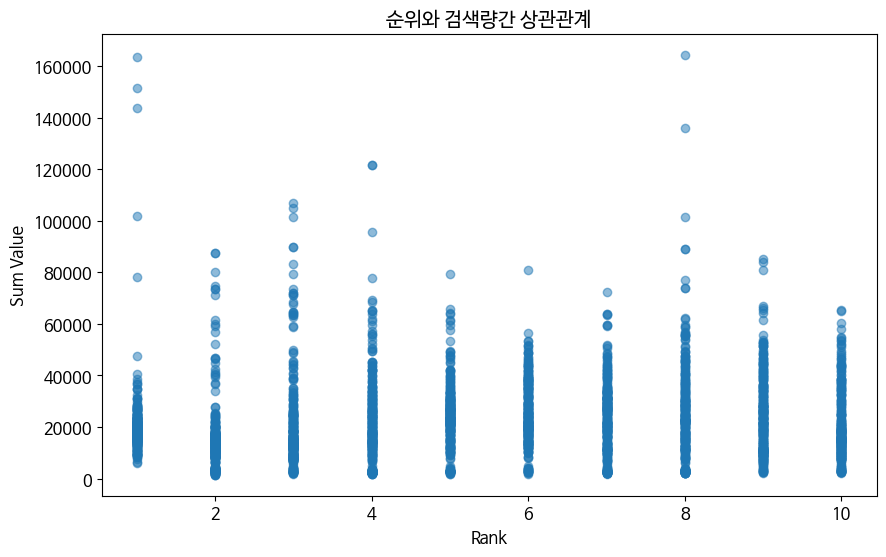

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('/content/22-23KBO데이터.csv', encoding='cp949')

# 누락된 값 처리
data = data.dropna(subset=['rank', 'sum_value'])

# 순위와 sum_value간의 상관계수 계산
correlation = data['rank'].corr(data['sum_value'])

print(f'순위와 검색량간의 상관계수는 {correlation}입니다.')

# 산점도로 시각화
plt.figure(figsize=(10, 6))
plt.scatter(data['rank'], data['sum_value'], alpha=0.5)
plt.title('순위와 검색량간 상관관계')
plt.xlabel('Rank')
plt.ylabel('Sum Value')
plt.show()


In [ ]:
from scipy.stats import spearmanr

rank_mean = df.groupby('rank')['sum_value'].mean().reset_index()

# 스피어만 상관계수 계산
corr, pval = spearmanr(rank_mean['rank'], rank_mean['sum_value'])

print(f'스피어만 상관계수: {corr:.2f}')
print(f'p-value: {pval:.4f}')

스피어만 상관계수: 0.52
p-value: 0.1276


상관계수가 0.52로 어느정도 상관관계가 존재하지만 p-value값이 0.05보다 높기에 우연히 발생했을 가능성이 높다고 판단.

승률과 검색량간의 상관계수는 -0.06644551281905807입니다.


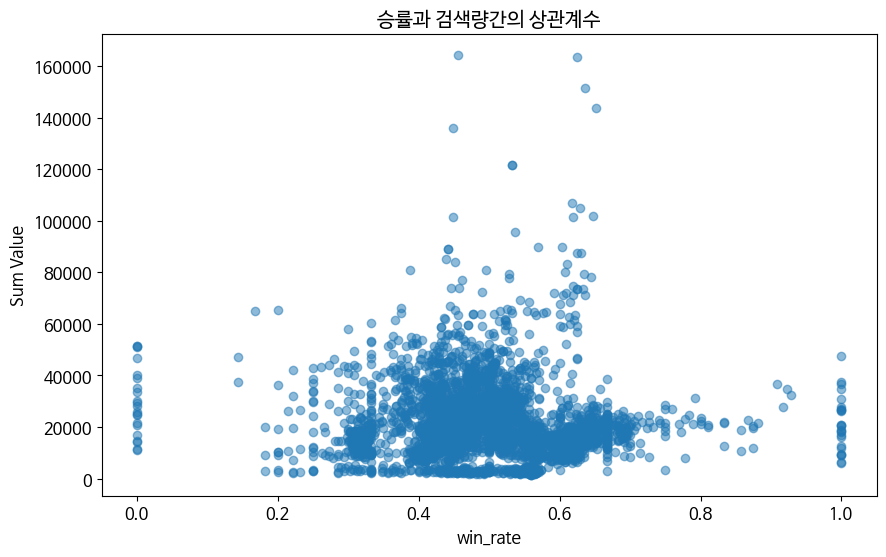

In [ ]:
# 데이터 불러오기
data = pd.read_csv('/content/22-23KBO데이터.csv', encoding='cp949')

# 누락된 값 처리
data = data.dropna(subset=['win_rate', 'sum_value'])

# 순위와 sum_value간의 상관계수 계산
correlation = data['win_rate'].corr(data['sum_value'])

print(f'승률과 검색량간의 상관계수는 {correlation}입니다.')

# 산점도로 시각화
plt.figure(figsize=(10, 6))
plt.scatter(data['win_rate'], data['sum_value'], alpha=0.5)
plt.title('승률과 검색량간의 상관계수')
plt.xlabel('win_rate')
plt.ylabel('Sum Value')
plt.show()


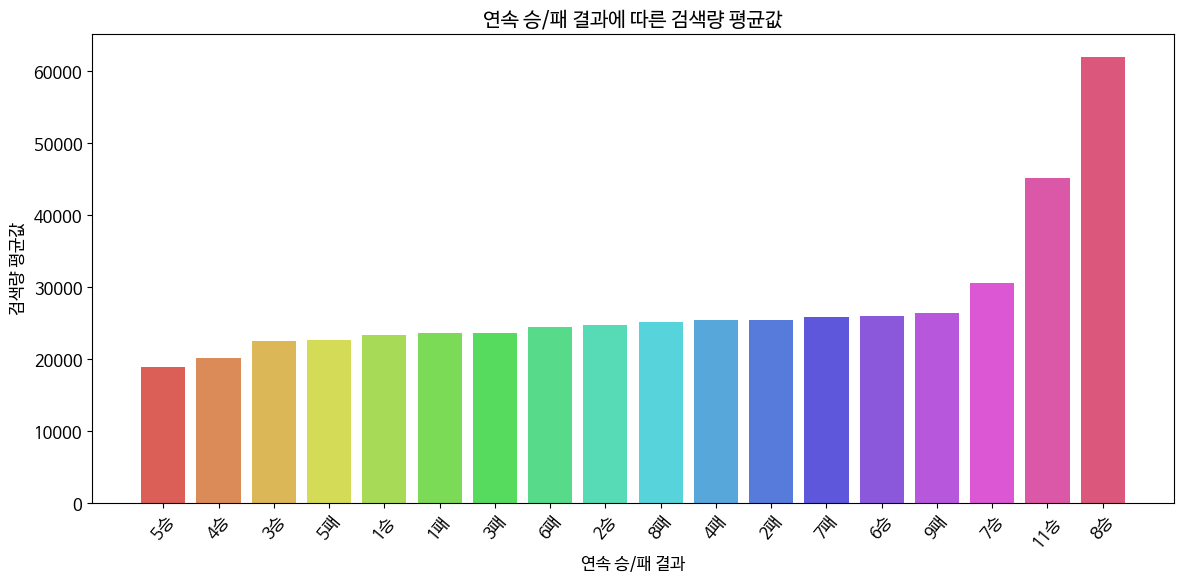

In [ ]:
# 그룹화 및 평균 계산
grouped_data = df.groupby('streak')['sum_value'].mean().reset_index()

# 정렬
sorted_data = grouped_data.sort_values(by='sum_value')

# 팔레트 불러오기
import seaborn as sns
palette = sns.color_palette("hls", len(sorted_data))

# 정렬된 데이터로 그래프 출력
plt.figure(figsize=(12, 6))
plt.bar(sorted_data['streak'], sorted_data['sum_value'], color=palette)
plt.xlabel('연속 승/패 결과')
plt.ylabel('검색량 평균값')
plt.title('연속 승/패 결과에 따른 검색량 평균값')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

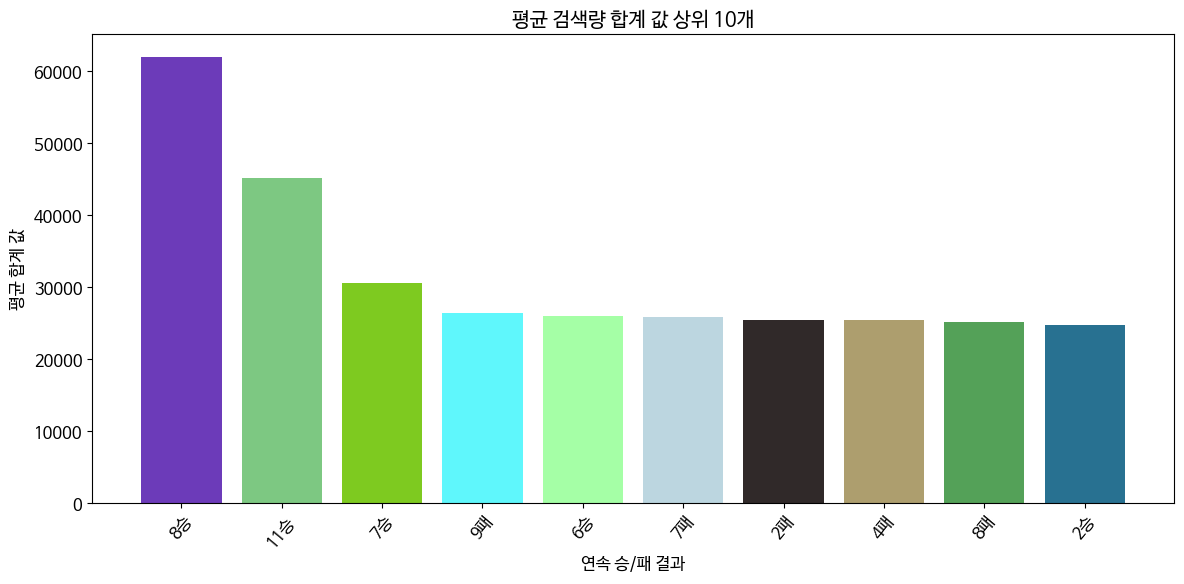

In [ ]:
# 그룹화 및 평균 계산
grouped_data = df.groupby('streak')['sum_value'].mean().reset_index()

# 평균 합계 값 기준 상위 10개 추출
top_10 = grouped_data.nlargest(10, 'sum_value')

# 정렬
sorted_data = top_10.sort_values(by='sum_value', ascending=False)

# 정렬된 데이터로 그래프 출력
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_data['streak'], sorted_data['sum_value'], color=np.random.rand(len(sorted_data), 3))
plt.xlabel('연속 승/패 결과')
plt.ylabel('평균 합계 값')
plt.title('평균 검색량 합계 값 상위 10개')
plt.xticks(rotation=50)
plt.tight_layout()

# 색상 범례 추가
color_labels = [str(bar.get_facecolor()) for bar in bars]


plt.show()

In [ ]:
data['streak'] = data['streak'].apply(lambda x: int(str(x).replace('승', '').replace('패', '')))

# 연속 값별 sum_value 평균 계산
streak_mean = data.groupby('streak')['sum_value'].mean().reset_index()

# 스피어만 상관계수 계산
corr, pval = spearmanr(streak_mean['streak'], streak_mean['sum_value'])

print(f'스피어만 상관계수: {corr:.2f}')
print(f'p-value: {pval:.4f}')

스피어만 상관계수: 0.73
p-value: 0.0158


## 관중수와 검색량 상관관계 분석

In [ ]:
home_data = data[data['home_or_away'] == 'home'].dropna(subset=['attendance'])

# 스피어만 상관계수 계산
corr, pval = spearmanr(home_data['attendance'], home_data['sum_value'])

print(f'스피어만 상관계수: {corr:.2f}')
print(f'p-value: {pval:.4f}')

스피어만 상관계수: -0.09
p-value: 0.0011


In [ ]:
from scipy.stats import pearsonr

df = pd.read_csv('/content/22-23KBO데이터최종.csv')

df = df.dropna(subset=['attendance', 'sum_value'])

# 상관계수 계산
corr, p_value = pearsonr(df['attendance'], df['sum_value'])

# 결과 출력
print(f"상관계수: {corr:.4f}")
print(f"p-value: {p_value:.4f}")

상관계수: 0.2151
p-value: 0.0000


관중수(home)과 검색량간에 상관계수는 낮음

In [ ]:
# 데이터 불러오기
data = pd.read_csv('/content/22-23KBO데이터.csv', encoding='cp949')

# 결측치 제거
data = data.dropna(subset=['stadium'])

# 구장별 평균 검색량 계산
stadium_mean = data.groupby('stadium')['sum_value'].mean().reset_index()
print(stadium_mean)

   stadium     sum_value
0       고척  20483.253472
1       광주  28740.555556
2       대구  26922.481481
3       대전  27575.599315
4       문학  22334.571429
5       사직  29688.728571
6       수원  13490.897260
7       울산  34583.687500
8       잠실  20117.475945
9       창원  18768.403448
10      포항  30532.666667


In [ ]:
# 데이터 불러오기
data = pd.read_csv('/content/22-23KBO데이터.csv', encoding='cp949')

data = data.dropna(subset=['stadium', 'attendance'])

# attendance 열에서 쉼표 제거 및 숫자로 변환
data['attendance'] = data['attendance'].str.replace(',', '').astype(int)

# stadium 열을 범주형으로 변환
data['stadium'] = data['stadium'].astype('category')

# 구장과 검색량 간의 상관관계 분석
corr_sum, pval_sum = spearmanr(data['stadium'].cat.codes, data['sum_value'])
print(f"구장과 검색량 간의 스피어만 상관계수: {corr_sum:.2f}, p-value: {pval_sum:.4f}")

# 구장과 관중수 간의 상관관계 분석
corr_att, pval_att = spearmanr(data['stadium'].cat.codes, data['attendance'])
print(f"구장과 관중수 간의 스피어만 상관계수: {corr_att:.2f}, p-value: {pval_att:.4f}")

구장과 검색량 간의 스피어만 상관계수: -0.17, p-value: 0.0000
구장과 관중수 간의 스피어만 상관계수: 0.09, p-value: 0.0000


구장을 범주형 데이터로 변환후 구장과 검색량/관중수 간에 상관관계를 구한 결과 서로 상관관계가 낮음.

승률과 관중수 상관관계

In [ ]:
df = pd.read_csv('/content/22-23KBO데이터최종.csv')

df = df.dropna(subset=['new_attendance', 'win_rate'])

# 상관계수 계산
corr, p_value = pearsonr(df['new_attendance'], df['win_rate'])

# 결과 출력
print(f"승률(win_rate)과 new_attendance 간의 상관계수: {corr:.4f}")
print(f"p-value: {p_value:.4f}")

승률(win_rate)과 new_attendance 간의 상관계수: 0.1738
p-value: 0.0000


순위와 관중수 상관계수

In [ ]:
# 결측치 제거
df = df.dropna(subset=['new_attendance', 'rank'])

# 상관계수 계산
corr, p_value = pearsonr(df['new_attendance'], df['rank'])

# 결과 출력
print(f"순위(rank)와 new_attendance 간의 상관계수: {corr:.4f}")
print(f"p-value: {p_value:.4f}")

순위(rank)와 new_attendance 간의 상관계수: -0.1866
p-value: 0.0000


연속(절댓값)과 관중수 상관관계

In [ ]:
df = pd.read_csv('/content/22-23KBO데이터최종.csv')

# 승리와 패배를 숫자로 변환하는 함수 정의 (음수 없이)
def convert_streak_absolute(streak):
    return int(''.join(filter(str.isdigit, streak)))

# new_streak 열 추가
df['new_streak'] = df['streak'].apply(convert_streak_absolute)
# 결측치 제거
df = df.dropna(subset=['attendance', 'new_streak'])

# 상관계수 계산
corr, p_value = pearsonr(df['attendance'], df['new_streak'])

# 결과 출력
print(f"연속과 attendance 간의 상관계수: {corr:.4f}")
print(f"p-value: {p_value:.4f}")


연속과 attendance 간의 상관계수: -0.0204
p-value: 0.4377


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

df = pd.read_csv('/content/kbo최종.csv')

df = df[df['day'] != '월']

# 요일을 숫자로 변환하는 함수
def convert_day_to_number(day):
    day_mapping = {'화': 2, '수': 3, '목': 4, '금': 5, '토': 6, '일': 7}
    return day_mapping.get(day, None)

# 요일을 숫자로 변환
df['day'] = df['day'].apply(convert_day_to_number)


# attendance가 null인 행 제거
df = df.dropna(subset=['attendance', 'day'])

corr, p_value = pearsonr(df['day'], df['attendance'])

# 결과 출력
print(f"요일과 관중수 간의 상관계수: {corr:.4f}")
print(f"p-value: {p_value:.4f}")

요일과 관중수 간의 상관계수: 0.4543
p-value: 0.0000


검색량과 관중 비율간 상관관계

sum_value와 attendance_ratio의 상관계수: 0.2805627118856344


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

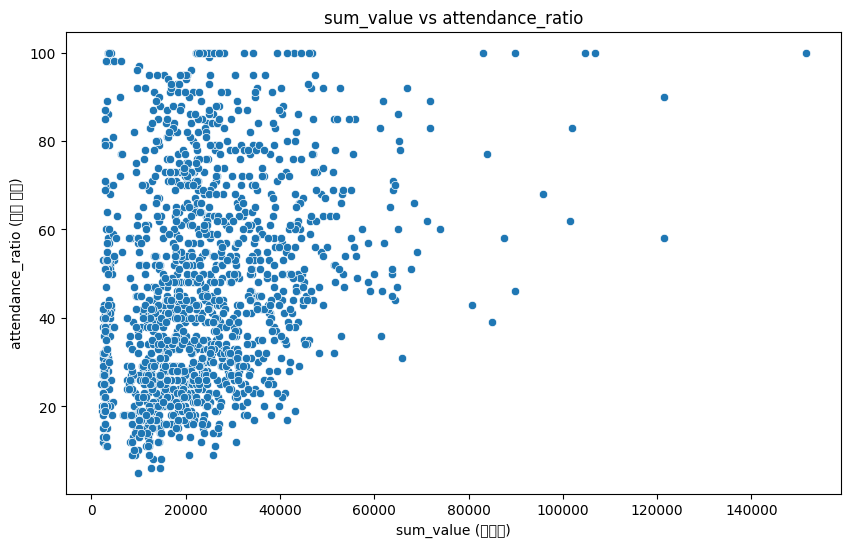


팀별 평균:
           sum_value  attendance_ratio
team                                  
롯데자이언츠  41374.337838         47.364865
기아타이거즈  36542.437500         44.930556
한화이글스   35055.712329         48.931507
삼성라이온즈  31778.409722         45.743056
SSG랜더스  22353.081633         61.163265
두산베어스   21569.178082         44.698630
키움히어로즈  17242.166667         40.618056
NC다이노스  16323.703448         36.193103
LG트윈스   13280.613793         59.434483
KT위즈     3453.267123         44.308219

팀별 상관계수:
team
NC다이노스    0.649957
롯데자이언츠    0.596713
키움히어로즈    0.552102
한화이글스     0.547714
LG트윈스     0.495447
SSG랜더스    0.478014
두산베어스     0.474153
삼성라이온즈    0.440863
기아타이거즈    0.414976
KT위즈      0.394094
dtype: float64


<ipython-input-8-4e88ebd20e70>:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  team_corr = df.groupby('team').apply(lambda x: x['sum_value'].corr(x['attendance_ratio'])).sort_values(ascending=False)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 (CSV 파일로 저장되어 있다고 가정)
df = pd.read_csv('/content/kbo최종.csv')

# 필요한 컬럼만 선택
df = df[['date', 'team', 'sum_value', 'attendance_ratio']]

# 결측치 제거
df = df.dropna(subset=['sum_value', 'attendance_ratio'])

# 상관계수 계산
correlation = df['sum_value'].corr(df['attendance_ratio'])

print(f"sum_value와 attendance_ratio의 상관계수: {correlation}")

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sum_value', y='attendance_ratio', data=df)
plt.title('sum_value vs attendance_ratio')
plt.xlabel('sum_value (검색량)')
plt.ylabel('attendance_ratio (관중 비율)')
plt.show()

# 팀별 평균 계산
team_avg = df.groupby('team')[['sum_value', 'attendance_ratio']].mean().sort_values('sum_value', ascending=False)
print("\n팀별 평균:")
print(team_avg)

# 팀별 상관계수 계산
team_corr = df.groupby('team').apply(lambda x: x['sum_value'].corr(x['attendance_ratio'])).sort_values(ascending=False)
print("\n팀별 상관계수:")
print(team_corr)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 로드
df = pd.read_csv('kbo최종.csv')

# 특성(X)과 타겟(y) 설정
features = ['rank', 'win_rate', 'new_streak', 'attendance_ratio', 'home_or_away', 'day']
X = df[features]
y = df['sum_value']

# 범주형 변수 원-핫 인코딩
X = pd.get_dummies(X, columns=['home_or_away', 'day'])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = rf_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# 특성 중요도 확인
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
print(feature_importance.sort_values('importance', ascending=False))

Mean Squared Error: 183058470.84174597
R-squared Score: 0.2016947607161803
              feature  importance
1            win_rate    0.368365
2          new_streak    0.179490
3    attendance_ratio    0.168917
0                rank    0.118574
11              day_토    0.027173
10              day_일    0.023752
12              day_화    0.022311
6               day_금    0.022219
7               day_목    0.022006
8               day_수    0.020865
4   home_or_away_away    0.018514
5   home_or_away_home    0.004808
9               day_월    0.003007


Mean Squared Error: 202415482.98055944
R-squared Score: 0.11728017920984712
            feature  importance
1          win_rate    0.447900
3  attendance_ratio    0.220414
2            streak    0.160985
0              rank    0.133350
4             day_토    0.037350


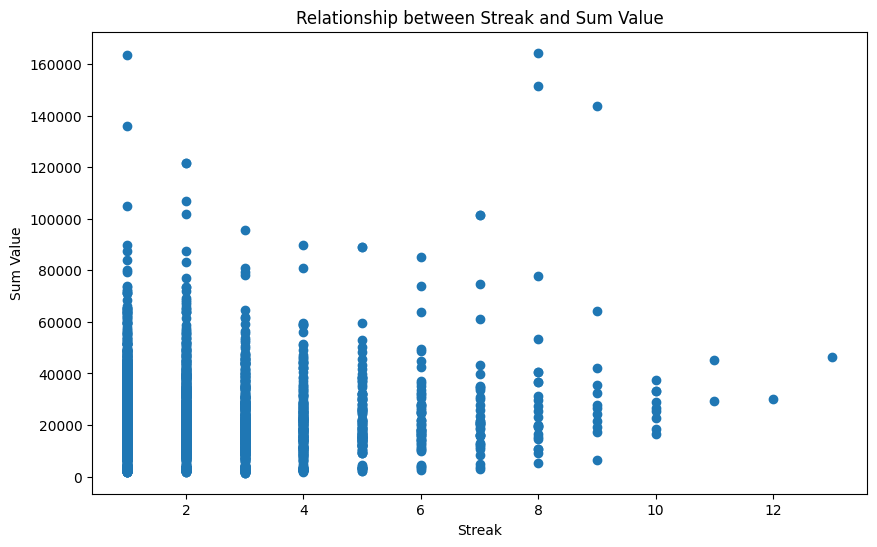

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

# 데이터 로드 (여기서는 'data'가 이미 로드되어 있다고 가정)
data = pd.read_csv('kbo최종.csv')

# streak 전처리
data['streak'] = data['streak'].apply(lambda x: int(str(x).replace('승', '').replace('패', '')))

# 특성(X)과 타겟(y) 설정
features = ['rank', 'win_rate', 'streak', 'attendance_ratio', 'home_or_away', 'day']
X = data[features]
y = data['sum_value']

# 범주형 변수 원-핫 인코딩
X = pd.get_dummies(X, columns=['home_or_away', 'day'])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 특성 선택 (RFE)
rfe = RFE(estimator=RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rfe, y_train)

# 예측 및 평가
y_pred = rf_model.predict(X_test_rfe)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# 선택된 특성 및 중요도 확인
selected_features = X.columns[rfe.support_]
feature_importance = pd.DataFrame({'feature': selected_features, 'importance': rf_model.feature_importances_})
print(feature_importance.sort_values('importance', ascending=False))

# streak와 sum_value의 관계 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(data['streak'], data['sum_value'])
plt.xlabel('Streak')
plt.ylabel('Sum Value')
plt.title('Relationship between Streak and Sum Value')
plt.show()

Mean Squared Error: 24830167.57551504
R-squared Score: 0.8917173743247986
              feature  importance
10     rolling_search    0.589238
11  home_or_away_away    0.075176
0                rank    0.055792
7    attendance_ratio    0.034951
9         day_of_week    0.034649
6          attendance    0.027961
8               month    0.026217
19              day_화    0.022234
18              day_토    0.020711
16              day_월    0.020370


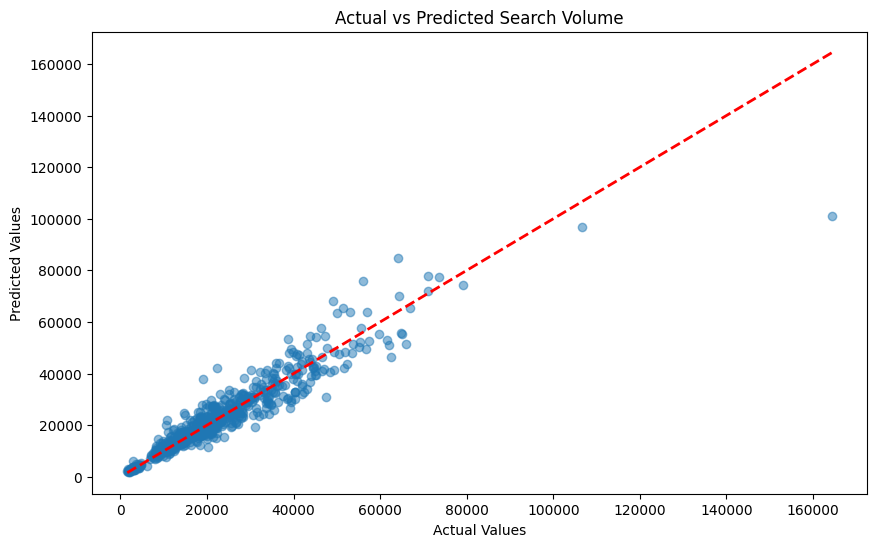

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE

# 데이터 로드 (여기서는 'data'가 이미 로드되어 있다고 가정)
data = pd.read_csv('kbo최종.csv')

# 데이터 전처리
data['streak'] = data['streak'].apply(lambda x: int(str(x).replace('승', '').replace('패', '')))
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['day_of_week'] = data['date'].dt.dayofweek

# 특성 엔지니어링
data['win_streak'] = np.where(data['streak'] > 0, data['streak'], 0)
data['lose_streak'] = np.where(data['streak'] < 0, -data['streak'], 0)
data['win_rate_streak'] = data['win_rate'] * data['streak']

# 이동 평균 특성 추가 (예: 최근 7일 평균 검색량)
data['rolling_search'] = data.groupby('team')['sum_value'].rolling(window=7, min_periods=1).mean().reset_index(0, drop=True)

# 특성(X)과 타겟(y) 설정
features = ['rank', 'win_rate', 'streak', 'win_streak', 'lose_streak', 'win_rate_streak',
            'attendance', 'attendance_ratio', 'month', 'day_of_week', 'rolling_search',
            'home_or_away', 'day']
X = data[features]
y = data['sum_value']

# 범주형 변수 원-핫 인코딩
X = pd.get_dummies(X, columns=['home_or_away', 'day'])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost 모델 학습
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.08, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = xgb_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# 특성 중요도 확인
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': xgb_model.feature_importances_})
print(feature_importance.sort_values('importance', ascending=False).head(10))

# 실제값과 예측값 비교 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Search Volume')
plt.show()

데이터 shape: (4895, 11)

첫 5개 행:
         date  day  rank team  win_rate streak  search_value stadium  \
0  2024.09.30    월     1  KIA     0.613     2승         43054      광주   
1  2024.09.30  NaN     2   삼성     0.549     1패         15281     NaN   
2  2024.09.30  NaN     3   LG     0.535     2승          7083     NaN   
3  2024.09.30  NaN     4   두산     0.521     4승         12793     NaN   
4  2024.09.30  NaN     5   KT     0.507     3승          8118     NaN   

  home_or_away  attendance  attendance_ratio  
0         home     20500.0             100.0  
1          NaN         NaN               NaN  
2          NaN         NaN               NaN  
3          NaN         NaN               NaN  
4          NaN         NaN               NaN  

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              4895 non-null   objec

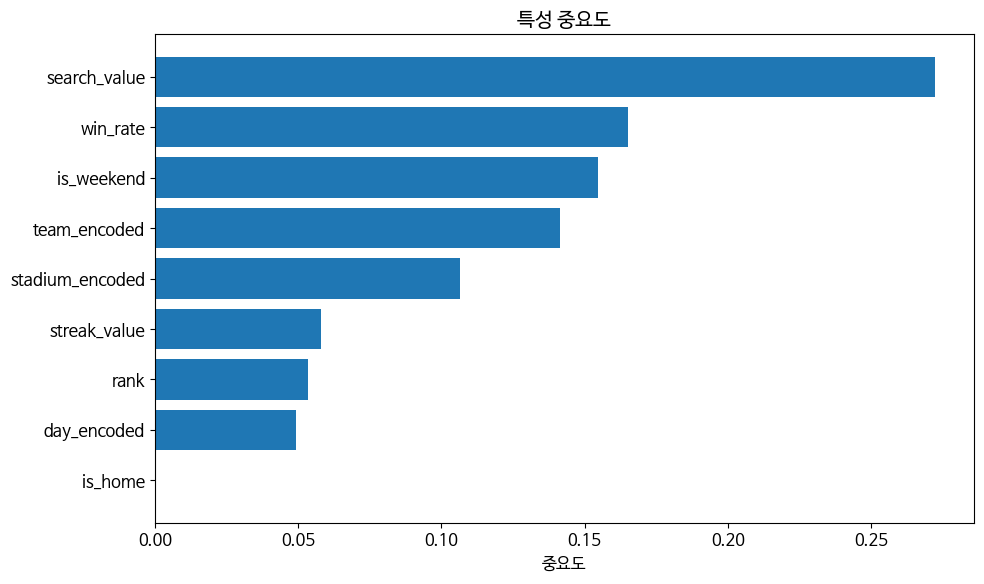

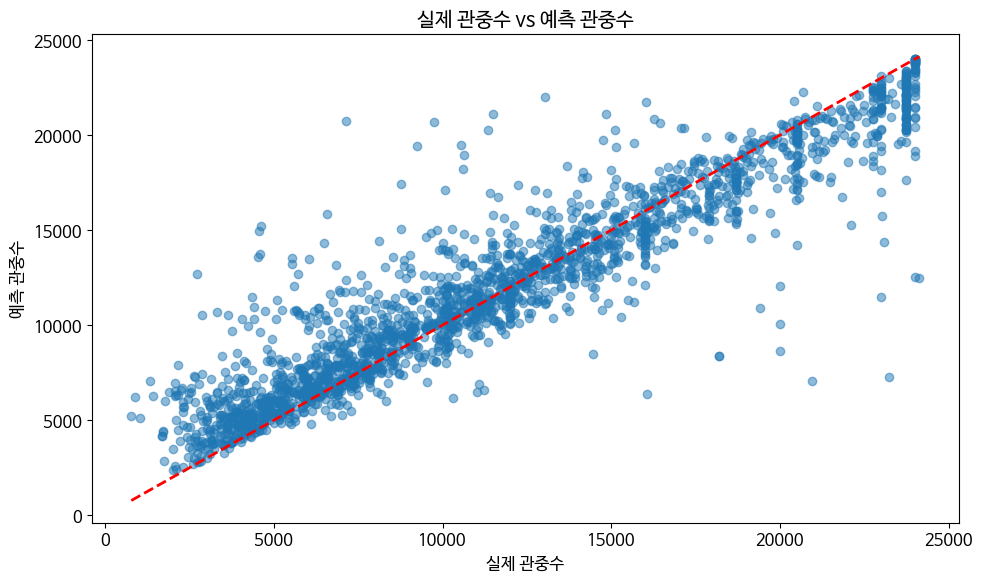


팀별 평균 관중수:
          mean      std
team                   
LG    16216.99  5724.53
SSG   14770.15  5057.22
두산    13521.37  7049.84
삼성    13241.33  6572.94
롯데    12720.04  5919.48
KIA   11916.25  5461.85
KT     9513.21  4811.15
키움     8015.94  4325.42
한화     7977.20  3342.76
NC     7619.82  4380.09


In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# 데이터 로드
df = pd.read_csv('/content/24KBO데이터최종종.csv')

# 기본 데이터 확인
print("데이터 shape:", df.shape)
print("\n첫 5개 행:")
print(df.head())
print("\n데이터 정보:")
print(df.info())

# 데이터 전처리
def prepare_data(df):
    # 날짜 변환
    df['date'] = pd.to_datetime(df['date'])

    # 요일 인코딩
    day_encoder = LabelEncoder()
    df['day_encoded'] = day_encoder.fit_transform(df['day'])

    # 팀명 인코딩
    team_encoder = LabelEncoder()
    df['team_encoded'] = team_encoder.fit_transform(df['team'])

    # 구장 인코딩
    stadium_encoder = LabelEncoder()
    df['stadium_encoded'] = stadium_encoder.fit_transform(df['stadium'])

    # home/away 처리
    df['is_home'] = (df['home_or_away'] == 'home').astype(int)

    # streak 처리
    df['streak_value'] = df['streak'].apply(lambda x:
        int(x[:-1]) if x.endswith('승') else -int(x[:-1]) if isinstance(x, str) else 0)

    # win_rate를 float로 변환
    df['win_rate'] = df['win_rate'].astype(float)

    # 주말/평일 특성 추가
    df['is_weekend'] = df['day'].isin(['토', '일']).astype(int)

    return df

# 데이터 전처리 실행
df_processed = prepare_data(df)

# 특성 선택
features = [
    'day_encoded', 'team_encoded', 'win_rate', 'streak_value',
    'search_value', 'stadium_encoded', 'is_home', 'rank', 'is_weekend'
]

# 결측치 처리
df_clean = df_processed.dropna(subset=['attendance'] + features)

# 데이터 분할
X = df_clean[features]
y = df_clean['attendance']

# 모델 학습 및 평가
def train_and_evaluate():
    tscv = TimeSeriesSplit(n_splits=5)
    models = []
    scores = []

    for train_idx, val_idx in tscv.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        pred = model.predict(X_val)
        score = r2_score(y_val, pred)
        scores.append(score)
        models.append(model)

        print(f"폴드 R2 점수: {score:.4f}")

    print(f"\n평균 R2 점수: {np.mean(scores):.4f}")
    return models, scores

# 모델 학습
models, scores = train_and_evaluate()

# 특성 중요도 시각화
def plot_feature_importance(model):
    importance = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=True)

    plt.figure(figsize=(10, 6))
    plt.barh(importance['feature'], importance['importance'])
    plt.title('특성 중요도')
    plt.xlabel('중요도')
    plt.tight_layout()
    plt.show()

plot_feature_importance(models[-1])

# 실제값 vs 예측값 시각화
def plot_predictions(model):
    predictions = model.predict(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(y, predictions, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('실제 관중수')
    plt.ylabel('예측 관중수')
    plt.title('실제 관중수 vs 예측 관중수')
    plt.tight_layout()
    plt.show()

plot_predictions(models[-1])

# 팀별 평균 관중수 분석
def analyze_team_attendance():
    team_attendance = df_clean.groupby('team')['attendance'].agg(['mean', 'std']).round(2)
    print("\n팀별 평균 관중수:")
    print(team_attendance.sort_values('mean', ascending=False))

analyze_team_attendance()